#### Compare different segmentation algorithms

- Otsu
- Canny
- Fuzzy
- Watershed


21BAI1061

Mandava Pranav

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

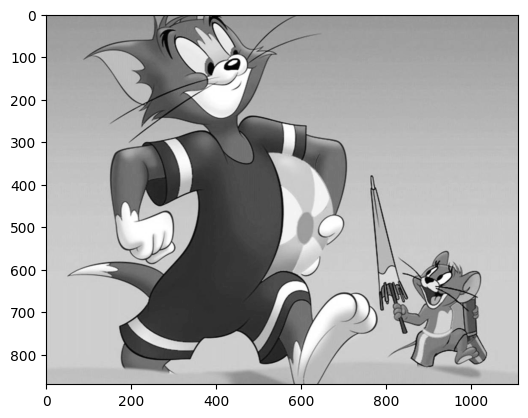

In [3]:
img = cv2.imread('/content/drive/MyDrive/machine-vision/tom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

(array([  157.,   271.,   261.,   293.,   366.,   413.,   390.,   412.,
          349.,   330.,   391.,   331.,   382.,   405.,   341.,   365.,
          388.,   403.,   397.,   407.,   438.,   398.,   376.,   397.,
          380.,   442.,   425.,   422.,   439.,   439.,   434.,   463.,
          479.,   530.,   516.,   572.,   682.,  1115.,  1141.,  1446.,
         1086.,   949.,   783.,   760.,   756.,  1073.,  5661.,  7816.,
        15246.,  9388.,  3976.,  5307.,  4734.,  5455.,  5174.,  2563.,
         3846.,  4148.,  2690.,  2501.,  2009.,  2135.,  1870.,  1841.,
         1926.,  1819.,  1818.,  1719.,  1891.,  2791.,  2596.,  2793.,
         2594.,  3146.,  4192.,  4603.,  6425.,  8484.,  4593.,  2479.,
         1766.,  1610.,  1394.,  1512.,  1462.,  1458.,  1393.,  1482.,
         1432.,  1331.,  1355.,  1309.,  1247.,  1280.,  1248.,  1263.,
         1274.,  1374.,  1406.,  1348.,  1407.,  1301.,  1255.,  1344.,
         1306.,  1438.,  1559.,  1730.,  2040.,  2161.,  2526., 

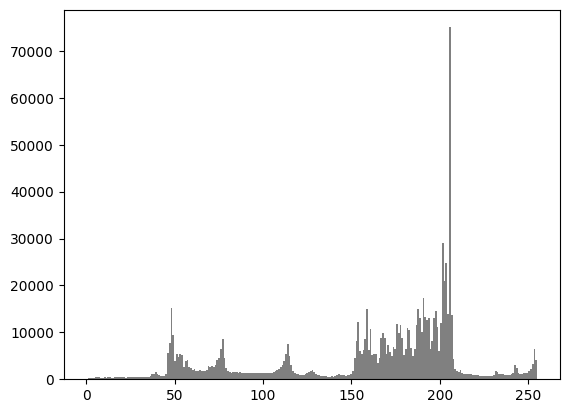

In [4]:
hist, bins = np.histogram(img.ravel(), bins=256, range=[0,256])

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.hist(img.ravel(), bins=256, color='gray')


In [5]:
img.shape

(870, 1111)

In [6]:
def factorial(x):
  if (x >= 0):
    if(type(x) != int):
      return None
    else:
      sum = 1
      for i in range(1, x + 1):
          sum *= i;

      return sum

  else:
    return None

In [7]:
print(factorial(0.5))
print(factorial(1/2))
print(factorial(-3))
print(factorial(0))
print(factorial(1))
print(factorial(5))

None
None
None
1
1
120


In [8]:
def otsu(bgr_image, kernel):

  gray = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  kernel = np.ones(kernel,np.uint8)
  closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
  sure_bg = cv2.dilate(closing,kernel,iterations=3)
  dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
  ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)
  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers+1
  markers[unknown==255] = 0
  markers = cv2.watershed(img,markers)
  img[markers == -1] = [255,0,0]


  return thresh

In [9]:
def watershed(bgr_image, kernel):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  kernel = np.ones(kernel,np.uint8)
  opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

  sure_bg = cv2.dilate(opening,kernel,iterations=3)

  dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)

  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers+1
  markers[unknown==255] = 0

  markers = cv2.watershed(img,markers)
  img[markers == -1] = [255,0,0]

  return markers



In [34]:
def canny_edge_detection(bgr_image, kernel):
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, kernel, 0)

    mag_max = np.max(blurred_image)
    high_th = cv2.threshold(blurred_image, 0, mag_max, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[0]
    low_th = 0.4*high_th
    edges = cv2.Canny(img, low_th, high_th)

    return edges


In [11]:
def fuzzy_segmentation(bgr_image, kernel):
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, kernel, 0)

    _, threshold = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_OTSU)

    membership = np.zeros_like(gray_image, dtype=np.float32)
    membership[gray_image > threshold] = 1.0
    membership[gray_image <= threshold] = 0.0


    return membership

(<Axes: >, <matplotlib.image.AxesImage at 0x7b241de53dc0>)

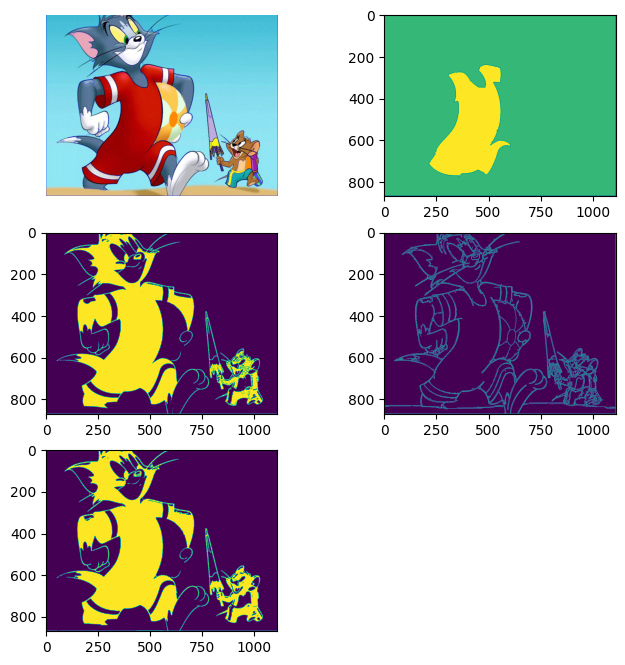

In [35]:
img = cv2.imread('/content/drive/MyDrive/machine-vision/tom.jpg')

watershed_img = watershed(img, (5,5))
otsu_img = otsu(img, (5,5))
canny_img = canny_edge_detection(img, (5,5))
fuzzy_img = fuzzy_segmentation(img, (5,5))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.subplot(321),plt.imshow(rgb_img)
plt.axis("off")
plt.subplot(322),plt.imshow(watershed_img)
plt.subplot(323),plt.imshow(otsu_img)
plt.subplot(324),plt.imshow(canny_img)
plt.subplot(325),plt.imshow(fuzzy_img)